In [10]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import random

Set seeds so the results won't change in different executions

In [11]:
random.seed(42)
np.random.seed(42)

# Dataset

In [12]:
current_directory = os.getcwd()
directory = os.path.join(current_directory, 'persian-tweets-emotional-dataset')
# directory = '/kaggle/input/persian-tweets-emotional-dataset'

csv_files = glob.glob(os.path.join(directory, '*.csv'))

csv_files

['f:\\university\\NNDL\\Projects\\Project4\\Q1\\persian-tweets-emotional-dataset\\anger.csv',
 'f:\\university\\NNDL\\Projects\\Project4\\Q1\\persian-tweets-emotional-dataset\\disgust.csv',
 'f:\\university\\NNDL\\Projects\\Project4\\Q1\\persian-tweets-emotional-dataset\\fear.csv',
 'f:\\university\\NNDL\\Projects\\Project4\\Q1\\persian-tweets-emotional-dataset\\joy.csv',
 'f:\\university\\NNDL\\Projects\\Project4\\Q1\\persian-tweets-emotional-dataset\\sad.csv',
 'f:\\university\\NNDL\\Projects\\Project4\\Q1\\persian-tweets-emotional-dataset\\surprise.csv']

- Get each csv
- Concatenate them
- Shuffle the dataset

In [13]:
dataframes = [pd.read_csv(file) for file in csv_files]

data_df = pd.concat(dataframes, ignore_index=True).sample(frac=1).reset_index(drop=True)
data_df.head()

,tweet,replyCount,retweetCount,likeCount,quoteCount,hashtags,sourceLabel,emotion
0,پادشاهی، دُرٍ ثمینی داشت\nبهرٍانگشتری، نگینی د...,0,0,9,0,['ملاهادی_سبزواری'],Twitter for Android,sad
1,خوابیدن بهتر از فیلم دیدنه\n\n#PremiosMTVMIAW...,0,0,1,0,"['PremiosMTVMIAW', 'MTVLAKPOPBLACKPINK', 'MTVL...",Twitter for iPhone,sad
2,پس اون 1500 نفری که در #آبان_٩٨ کشتین فقط بخا...,1,0,2,0,"['آبان_٩٨', 'هواپیمای_اوکراینی']",Twitter Web App,anger
3,.ـ.ـ.ـ.ـ.ـ.ـ.ـ\nحسن روحانی: امریکا آمده توبه ک...,0,8,8,0,"['صف_تغییر', 'بصیرت_بیدار']",Twitter for Android,sad
4,میترسم #رئيسی که میخاست سید محرومان شود، سید م...,0,0,0,0,"['رئيسی', 'انتخابات']",Twitter for Android,fear


In [14]:
final_data = data_df[['tweet', 'emotion']]
final_data.head()

,tweet,emotion
0,پادشاهی، دُرٍ ثمینی داشت\nبهرٍانگشتری، نگینی د...,sad
1,خوابیدن بهتر از فیلم دیدنه\n\n#PremiosMTVMIAW...,sad
2,پس اون 1500 نفری که در #آبان_٩٨ کشتین فقط بخا...,anger
3,.ـ.ـ.ـ.ـ.ـ.ـ.ـ\nحسن روحانی: امریکا آمده توبه ک...,sad
4,میترسم #رئيسی که میخاست سید محرومان شود، سید م...,fear


The plot showing the distribution of each label in Dataset

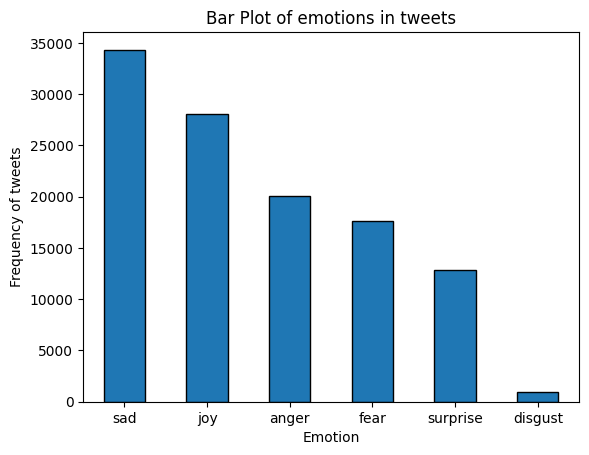

In [15]:
final_data['emotion'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Emotion')
plt.ylabel('Frequency of tweets')
plt.title('Bar Plot of emotions in tweets')
plt.xticks(rotation=0)
plt.show()

# Preprocessing

these are the libraries that we used for preprocessing the tweets.

In [16]:
!pip install hazm emoji

In [17]:
import re
from hazm import Normalizer, word_tokenize, Stemmer, stopwords_list, Lemmatizer
import emoji
import string

This function uses regex to remove HTML and URL's.

In [18]:
def remove_html_and_urls(tweet):
    html_pattern = re.compile(r'<.*?>')
    url_pattern = re.compile(r'http\S+|www.\S+')
    tweet = html_pattern.sub(r'', tweet)
    tweet = url_pattern.sub(r'', tweet)
    return tweet

This function also uses regex to remove punctuation.

In [19]:
def remove_punctuations(tweet):
    return re.sub(r'[^\w\s]', '', tweet)

This one removes the charecters that are not in 32 letters of persian language.

In [20]:
def remove_non_persian_chars(text):
    # Characters and spaces
    pattern = re.compile(r'[^ء-ی\s،؛؟.،!?؛]')
    return pattern.sub('', text)

This function is used for removing repeted characters in a word when it is repeted more than twice.

In [21]:
def remove_repetitive_characters(tweet):
    pattern = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pattern.sub(r'\1', tweet)

This function removes stop words.

In [22]:
def remove_stopwords(tweet):
    stop_words = set(stopwords_list())
    words = word_tokenize(tweet)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

This function replaces emojis with the related word. (It is not used)

In [23]:
def replace_emojis(tweet):
    return emoji.demojize(tweet)

Remove emojis

In [24]:
def remove_emojis(tweet):
    emoj = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
                    "]+", re.UNICODE)
    return re.sub(emoj, '', tweet)

This function is used to stem each word in tweets

In [25]:
def stem_words(tweet):
    stemmer = Stemmer()
    words = word_tokenize(tweet)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

This is the preprocessing function to apply all the above functions.

In [26]:
def preprocessing(df):
    df = df.copy()  # Make a copy to avoid modifying the original DataFrame
    df['tweet'] = (df['tweet']
                   .apply(remove_html_and_urls)
                   .apply(remove_punctuations)
                   .apply(remove_non_persian_chars)
                   .apply(remove_stopwords)
                   .apply(remove_repetitive_characters)
                   .apply(replace_emojis)
                   .apply(stem_words))
    return df

In [27]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, TFAutoModel
import torch

In [28]:
example = final_data['tweet'][2]
print('Example:\n ', example)

example = remove_html_and_urls(example)
print("\nAfter removing HTML and URL's:\n ", example)

example = remove_punctuations(example)
print("\nRemoving punctuations:\n ", example)

example = remove_non_persian_chars(example)
print("\nOnly persian characters:\n ", example)

example = remove_stopwords(example)
print("\nRemoving stop words:\n ", example)

example = remove_repetitive_characters(example)
print("\nAfter removing repeated chars in a word:\n ", example)

example = replace_emojis(example)
print("\nReplacing emojis:\n ", example)

example = stem_words(example)
print("\nStemming:\n ", example)

Example:
   پس اون 1500 نفری که در #آبان_٩٨ کشتین فقط بخاطر اینکه اعتراض مسالمت آمیز که از حقوق اولیه مردمه و در قانون اساسی هم اومده آدم محترم نبودن؟ اون بیچاره هایی که در #هواپیمای_اوکراینی کشتین در حالیکه بدون کوچکترین آزاری در حال خروج قانونی از ایران بودن چی؟ اونها محترم نبودن؟

After removing HTML and URL's:
   پس اون 1500 نفری که در #آبان_٩٨ کشتین فقط بخاطر اینکه اعتراض مسالمت آمیز که از حقوق اولیه مردمه و در قانون اساسی هم اومده آدم محترم نبودن؟ اون بیچاره هایی که در #هواپیمای_اوکراینی کشتین در حالیکه بدون کوچکترین آزاری در حال خروج قانونی از ایران بودن چی؟ اونها محترم نبودن؟

Removing punctuations:
   پس اون 1500 نفری که در آبان_٩٨ کشتین فقط بخاطر اینکه اعتراض مسالمت آمیز که از حقوق اولیه مردمه و در قانون اساسی هم اومده آدم محترم نبودن اون بیچاره هایی که در هواپیمای_اوکراینی کشتین در حالیکه بدون کوچکترین آزاری در حال خروج قانونی از ایران بودن چی اونها محترم نبودن

Only persian characters:
   پس اون  نفری که در آبان٩٨ کشتین فقط بخاطر اینکه اعتراض مسالمت آمیز که از حقوق اولیه مر

In [ ]:
# current_directory = os.getcwd()
current_directory = '/kaggle/working/'

files_in_directory = os.listdir(current_directory)
json_files = [file for file in files_in_directory if file.endswith('.json')]

if 'cleaned_data.json' in json_files:
    # Read the JSON file
    cleaned_data = pd.read_json(os.path.join(current_directory, 'cleaned_data.json'), orient='records', lines=True)

else:
    cleaned_data = preprocessing(final_data)
    cleaned_data['tweet'] = cleaned_data['tweet'].apply(lambda tweet: tweet if len(tweet) != 0 else None)
    cleaned_data = cleaned_data.dropna(subset=['tweet']).reset_index(drop=True)

    # Save the cleaned data to a JSON file
    cleaned_data.to_json(os.path.join(current_directory, 'cleaned_data.json'), orient='records', lines=True)

In [21]:
cleaned_data.head()

,tweet,emotion
0,نخواهم_شد خندیدن شاد نخواهم_شد زور گفتن نیرومن...,joy
1,آیتالله عل خامن رهبر جمهور اسلام ایر اظهار محم...,anger
2,انتخاب شرک دشمن مل بدخواه کشور حضور انتخاب ب ب...,fear
3,هس بیدل بیدس باده مس ساق خمار مرا ا دل قلا مکن...,anger
4,ک نشناس پنتاگون وینر,surprise


# Configuration

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

device: cuda:0


In [23]:
main_labels = cleaned_data['emotion'].unique()

label2id = {label: i for i, label in enumerate(main_labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'joy': 0, 'anger': 1, 'fear': 2, 'surprise': 3, 'sad': 4, 'disgust': 5}
id2label: {0: 'joy', 1: 'anger', 2: 'fear', 3: 'surprise', 4: 'sad', 5: 'disgust'}


In [24]:
# ParseBert tokenizer
tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')

# ParseBert config
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased",
                                    **{'label2id': label2id,
                                       'id2label': id2label,},
                                    max_position_embeddings=120)
print(config.to_json_string())

{
  "_name_or_path": "HooshvareLab/bert-base-parsbert-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "joy",
    "1": "anger",
    "2": "fear",
    "3": "surprise",
    "4": "sad",
    "5": "disgust"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 1,
    "disgust": 5,
    "fear": 2,
    "joy": 0,
    "sad": 4,
    "surprise": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 120,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.39.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



# Dataloader

In [25]:
from torch.utils.data import Dataset, DataLoader

In [26]:
class Tweets(Dataset):
    def __init__(self, data, main_labels, max_len=32, embedding_size=120):
        self.data = data
        self.max_len = max_len
        self.embedding_size = embedding_size
        self.main_labels = main_labels
        self.label2id = {label: i for i, label in enumerate(set(main_labels))}
        self.id2label = {v: k for k, v in self.label2id.items()}
        self.tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        tweet = self.data.iloc[idx]['tweet']
        label = self.label2id[self.data.iloc[idx]['emotion']]

        encoding = self.tokenizer(tweet, max_length=self.max_len, padding='max_length', truncation=True, return_tensors='pt')

        inputs = {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label)
        }

        return inputs

In [27]:
def construct_DataLoader(data, main_labels, batch_size=16, max_len=32, embedding_size=120):
    dataset = Tweets(data, main_labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train, test = train_test_split(cleaned_data, test_size=0.3, random_state=42)
train, valid = train_test_split(train, test_size=0.2, random_state=42)

# Model

In [69]:
import torch.nn as nn
import torch.optim as optim
from typing import List, Tuple, Dict

In [98]:
import itertools
from torch.optim import Adam, SGD
from sklearn.metrics import precision_score, recall_score, f1_score

In [107]:
def train_model(model: nn.Module, train_loader: DataLoader, criterion: nn.Module, optimizer: torch.optim.Optimizer, num_epochs: int) -> Dict[str, float]:
    best_train_metrics = {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}
    model.train()
    for epoch in range(num_epochs):
        train_labels = []
        train_preds = []
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            optimizer.zero_grad()
            outputs = model({'input_ids': input_ids, 'attention_mask': attention_mask})
            _, predicted = torch.max(outputs, 1)
            train_labels.extend(labels.tolist())
            train_preds.extend(predicted.tolist())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
        train_precision = precision_score(train_labels, train_preds, average='weighted')
        train_recall = recall_score(train_labels, train_preds, average='weighted')
        train_f1 = f1_score(train_labels, train_preds, average='weighted')
        train_accuracy = sum([1 for true, pred in zip(train_labels, train_preds) if true == pred]) / len(train_labels)
        
        if train_f1 > best_train_metrics['f1']:
            best_train_metrics = {
                'accuracy': train_accuracy,
                'precision': train_precision,
                'recall': train_recall,
                'f1': train_f1
            }
        print(f'Epoch {epoch + 1}/{num_epochs}: Train Accuracy: {train_accuracy:.2f}, Train Precision: {train_precision:.2f}, Train Recall: {train_recall:.2f}, Train F1: {train_f1:.2f}')
        best_val_metrics = validate_model(model, val_loader)
    
    return best_train_metrics, best_val_metrics

In [108]:
def validate_model(model: nn.Module, val_loader: DataLoader) -> Dict[str, float]:
    best_val_metrics = {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model({'input_ids': input_ids, 'attention_mask': attention_mask})
            _, predicted = torch.max(outputs, 1)
            val_labels.extend(labels.tolist())
            val_preds.extend(predicted.tolist())
    
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    val_accuracy = sum([1 for true, pred in zip(val_labels, val_preds) if true == pred]) / len(val_labels)
    
    if val_f1 > best_val_metrics['f1']:
        best_val_metrics = {
            'accuracy': val_accuracy,
            'precision': val_precision,
            'recall': val_recall,
            'f1': val_f1
        }
    print(f'Val Accuracy: {val_accuracy:.2f}, Val Precision: {val_precision:.2f}, Val Recall: {val_recall:.2f}, Val F1: {val_f1:.2f}')
    
    return best_val_metrics

In [109]:
def test_model(model: nn.Module, test_loader: DataLoader) -> Dict[str, float]:
    test_labels = []
    test_preds = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model({'input_ids': input_ids, 'attention_mask': attention_mask})
            _, predicted = torch.max(outputs, 1)
            test_labels.extend(labels.tolist())
            test_preds.extend(predicted.tolist())
    
    test_precision = precision_score(test_labels, test_preds, average='weighted')
    test_recall = recall_score(test_labels, test_preds, average='weighted')
    test_f1 = f1_score(test_labels, test_preds, average='weighted')
    test_accuracy = sum([1 for true, pred in zip(test_labels, test_preds) if true == pred]) / len(test_labels)

    print(f'Test Accuracy: {test_accuracy:.2f}, Test Precision: {test_precision:.2f}, Test Recall: {test_recall:.2f}, Test F1: {test_f1:.2f}')
    
    return {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1
    }

## CNN-LSTM

In [97]:
class CNN_LSTM(nn.Module):
    def __init__(self, embedding_size, num_classes, hidden_dim, dropout_rate):
        super(CNN_LSTM, self).__init__()
#         config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
        self.bert = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")#, config=config)

#         # Adjusting token embeddings, position embeddings, and token type embeddings to the required embedding size
#         self.bert.embeddings.word_embeddings = nn.Embedding(config.vocab_size, embedding_size)
#         self.bert.embeddings.position_embeddings = nn.Embedding(config.max_position_embeddings, embedding_size)
#         self.bert.embeddings.token_type_embeddings = nn.Embedding(config.type_vocab_size, embedding_size)
#         self.bert.embeddings.LayerNorm = nn.LayerNorm(embedding_size, eps=config.layer_norm_eps)
        
#         self.conv1d = nn.Conv1d(in_channels=embedding_size, out_channels=32, kernel_size=3, padding=1)
        self.conv1d = nn.Conv1d(in_channels=768, out_channels=32, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool1d(kernel_size=2)
        self.lstm = nn.LSTM(input_size=32, hidden_size=hidden_dim, batch_first=True)
        self.spatial_dropout = nn.Dropout1d(dropout_rate)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        input_ids = x['input_ids'].to(device)
        attention_mask = x['attention_mask'].to(device)
        with torch.no_grad():
            bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
            x = bert_outputs[0]
        
        x = x.permute(0, 2, 1)
        x = self.conv1d(x)
        x = self.max_pool(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.spatial_dropout(x)
        x = x[:, -1, :]
        x = self.fc(x)
        
        return x

In [110]:
# Model parameters
reduced_dim = 120
hidden_dim = 128
num_classes = len(main_labels)
dropout_rate = 0.2

In [111]:
batch_sizes = [8, 64]
learning_rates = [0.001, 0.0001]
optimizers = [Adam, SGD]

In [112]:
results = []
for batch_size, lr, optimizer_class in itertools.product(batch_sizes, learning_rates, optimizers):
    print(f"Initializing model with batch_size={batch_size}, lr={lr}, optimizer={optimizer_class.__name__}")
    train_loader = construct_DataLoader(train, main_labels, batch_size=batch_size)
    test_loader = construct_DataLoader(test, main_labels, batch_size=batch_size)
    val_loader = construct_DataLoader(valid, main_labels, batch_size=batch_size)
    
    model = CNN_LSTM(embedding_size=reduced_dim, num_classes=num_classes, hidden_dim=hidden_dim, dropout_rate=dropout_rate).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_class(model.parameters(), lr=lr)
    
    best_train_metrics, best_val_metrics = train_model(model, train_loader, criterion, optimizer, num_epochs=10)
    test_metrics = test_model(model, test_loader)
    
    results.append((batch_size, lr, optimizer_class.__name__, best_val_metrics['accuracy'], best_val_metrics['precision'],
                    best_val_metrics['recall'], best_val_metrics['f1'], test_metrics['accuracy'], test_metrics['precision'],
                    test_metrics['recall'], test_metrics['f1']))

Initializing model with batch_size=8, lr=0.001, optimizer=Adam
Epoch 1/10: Train Accuracy: 0.57, Train Precision: 0.60, Train Recall: 0.57, Train F1: 0.56
Val Accuracy: 0.66, Val Precision: 0.72, Val Recall: 0.66, Val F1: 0.66
Epoch 2/10: Train Accuracy: 0.68, Train Precision: 0.71, Train Recall: 0.68, Train F1: 0.68
Val Accuracy: 0.69, Val Precision: 0.73, Val Recall: 0.69, Val F1: 0.69
Epoch 3/10: Train Accuracy: 0.70, Train Precision: 0.73, Train Recall: 0.70, Train F1: 0.70
Val Accuracy: 0.70, Val Precision: 0.74, Val Recall: 0.70, Val F1: 0.70
Epoch 4/10: Train Accuracy: 0.71, Train Precision: 0.74, Train Recall: 0.71, Train F1: 0.71
Val Accuracy: 0.71, Val Precision: 0.75, Val Recall: 0.71, Val F1: 0.71
Epoch 5/10: Train Accuracy: 0.72, Train Precision: 0.75, Train Recall: 0.72, Train F1: 0.72
Val Accuracy: 0.71, Val Precision: 0.75, Val Recall: 0.71, Val F1: 0.71
Epoch 6/10: Train Accuracy: 0.72, Train Precision: 0.75, Train Recall: 0.72, Train F1: 0.72
Val Accuracy: 0.71, Val P

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10: Train Accuracy: 0.31, Train Precision: 0.29, Train Recall: 0.31, Train F1: 0.19


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.37, Val Precision: 0.23, Val Recall: 0.37, Val F1: 0.26


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2/10: Train Accuracy: 0.39, Train Precision: 0.40, Train Recall: 0.39, Train F1: 0.31


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.43, Val Precision: 0.44, Val Recall: 0.43, Val F1: 0.39


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/10: Train Accuracy: 0.45, Train Precision: 0.45, Train Recall: 0.45, Train F1: 0.41


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.46, Val Precision: 0.51, Val Recall: 0.46, Val F1: 0.41


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4/10: Train Accuracy: 0.48, Train Precision: 0.49, Train Recall: 0.48, Train F1: 0.46


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.50, Val Precision: 0.51, Val Recall: 0.50, Val F1: 0.48


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5/10: Train Accuracy: 0.50, Train Precision: 0.51, Train Recall: 0.50, Train F1: 0.49


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.52, Val Precision: 0.56, Val Recall: 0.52, Val F1: 0.51


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6/10: Train Accuracy: 0.52, Train Precision: 0.53, Train Recall: 0.52, Train F1: 0.51


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.52, Val Precision: 0.57, Val Recall: 0.52, Val F1: 0.51


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7/10: Train Accuracy: 0.53, Train Precision: 0.54, Train Recall: 0.53, Train F1: 0.52


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.53, Val Precision: 0.56, Val Recall: 0.53, Val F1: 0.52


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8/10: Train Accuracy: 0.53, Train Precision: 0.55, Train Recall: 0.53, Train F1: 0.52


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.54, Val Precision: 0.56, Val Recall: 0.54, Val F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9/10: Train Accuracy: 0.54, Train Precision: 0.56, Train Recall: 0.54, Train F1: 0.53


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.55, Val Precision: 0.58, Val Recall: 0.55, Val F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10/10: Train Accuracy: 0.55, Train Precision: 0.56, Train Recall: 0.55, Train F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.55, Val Precision: 0.58, Val Recall: 0.55, Val F1: 0.53


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.55, Test Precision: 0.57, Test Recall: 0.55, Test F1: 0.54
Initializing model with batch_size=8, lr=0.0001, optimizer=Adam


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10: Train Accuracy: 0.49, Train Precision: 0.51, Train Recall: 0.49, Train F1: 0.48


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.53, Val Precision: 0.58, Val Recall: 0.53, Val F1: 0.52
Epoch 2/10: Train Accuracy: 0.55, Train Precision: 0.57, Train Recall: 0.55, Train F1: 0.54
Val Accuracy: 0.57, Val Precision: 0.59, Val Recall: 0.57, Val F1: 0.56
Epoch 3/10: Train Accuracy: 0.60, Train Precision: 0.63, Train Recall: 0.60, Train F1: 0.60
Val Accuracy: 0.62, Val Precision: 0.68, Val Recall: 0.62, Val F1: 0.62
Epoch 4/10: Train Accuracy: 0.64, Train Precision: 0.68, Train Recall: 0.64, Train F1: 0.64
Val Accuracy: 0.65, Val Precision: 0.69, Val Recall: 0.65, Val F1: 0.65
Epoch 5/10: Train Accuracy: 0.66, Train Precision: 0.70, Train Recall: 0.66, Train F1: 0.66
Val Accuracy: 0.67, Val Precision: 0.71, Val Recall: 0.67, Val F1: 0.67
Epoch 6/10: Train Accuracy: 0.68, Train Precision: 0.71, Train Recall: 0.68, Train F1: 0.68
Val Accuracy: 0.69, Val Precision: 0.72, Val Recall: 0.69, Val F1: 0.69
Epoch 7/10: Train Accuracy: 0.69, Train Precision: 0.73, Train Recall: 0.69, Train F1: 0.69
Val Accuracy: 0.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.27, Val Precision: 0.37, Val Recall: 0.27, Val F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2/10: Train Accuracy: 0.28, Train Precision: 0.12, Train Recall: 0.28, Train F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.27, Val Precision: 0.12, Val Recall: 0.27, Val F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/10: Train Accuracy: 0.28, Train Precision: 0.12, Train Recall: 0.28, Train F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.27, Val Precision: 0.12, Val Recall: 0.27, Val F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4/10: Train Accuracy: 0.28, Train Precision: 0.37, Train Recall: 0.28, Train F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.28, Val Precision: 0.37, Val Recall: 0.28, Val F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5/10: Train Accuracy: 0.30, Train Precision: 0.26, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.25, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6/10: Train Accuracy: 0.30, Train Precision: 0.30, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.33, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7/10: Train Accuracy: 0.30, Train Precision: 0.29, Train Recall: 0.30, Train F1: 0.15


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.31, Val Precision: 0.29, Val Recall: 0.31, Val F1: 0.15


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8/10: Train Accuracy: 0.31, Train Precision: 0.29, Train Recall: 0.31, Train F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.31, Val Precision: 0.29, Val Recall: 0.31, Val F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9/10: Train Accuracy: 0.32, Train Precision: 0.29, Train Recall: 0.32, Train F1: 0.18


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.33, Val Precision: 0.27, Val Recall: 0.33, Val F1: 0.20


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10/10: Train Accuracy: 0.34, Train Precision: 0.26, Train Recall: 0.34, Train F1: 0.22


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.34, Val Precision: 0.26, Val Recall: 0.34, Val F1: 0.22


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.34, Test Precision: 0.26, Test Recall: 0.34, Test F1: 0.22
Initializing model with batch_size=64, lr=0.001, optimizer=Adam
Epoch 1/10: Train Accuracy: 0.56, Train Precision: 0.59, Train Recall: 0.56, Train F1: 0.56
Val Accuracy: 0.63, Val Precision: 0.65, Val Recall: 0.63, Val F1: 0.63
Epoch 2/10: Train Accuracy: 0.67, Train Precision: 0.71, Train Recall: 0.67, Train F1: 0.67
Val Accuracy: 0.69, Val Precision: 0.73, Val Recall: 0.69, Val F1: 0.69
Epoch 3/10: Train Accuracy: 0.70, Train Precision: 0.73, Train Recall: 0.70, Train F1: 0.70
Val Accuracy: 0.70, Val Precision: 0.73, Val Recall: 0.70, Val F1: 0.70
Epoch 4/10: Train Accuracy: 0.71, Train Precision: 0.74, Train Recall: 0.71, Train F1: 0.71
Val Accuracy: 0.70, Val Precision: 0.74, Val Recall: 0.70, Val F1: 0.70
Epoch 5/10: Train Accuracy: 0.71, Train Precision: 0.75, Train Recall: 0.71, Train F1: 0.71
Val Accuracy: 0.71, Val Precision: 0.74, Val Recall: 0.71, Val F1: 0.71
Epoch 6/10: Train Accuracy: 0.72, Train 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10: Train Accuracy: 0.31, Train Precision: 0.26, Train Recall: 0.31, Train F1: 0.19


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.35, Val Precision: 0.27, Val Recall: 0.35, Val F1: 0.23


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2/10: Train Accuracy: 0.39, Train Precision: 0.46, Train Recall: 0.39, Train F1: 0.30


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.42, Val Precision: 0.46, Val Recall: 0.42, Val F1: 0.36


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/10: Train Accuracy: 0.46, Train Precision: 0.47, Train Recall: 0.46, Train F1: 0.43


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.44, Val Precision: 0.51, Val Recall: 0.44, Val F1: 0.43


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4/10: Train Accuracy: 0.50, Train Precision: 0.51, Train Recall: 0.50, Train F1: 0.48


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.51, Val Precision: 0.54, Val Recall: 0.51, Val F1: 0.51


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5/10: Train Accuracy: 0.52, Train Precision: 0.53, Train Recall: 0.52, Train F1: 0.51


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.48, Val Precision: 0.56, Val Recall: 0.48, Val F1: 0.47


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6/10: Train Accuracy: 0.53, Train Precision: 0.54, Train Recall: 0.53, Train F1: 0.52


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.50, Val Precision: 0.62, Val Recall: 0.50, Val F1: 0.48


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7/10: Train Accuracy: 0.53, Train Precision: 0.55, Train Recall: 0.53, Train F1: 0.52


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.52, Val Precision: 0.56, Val Recall: 0.52, Val F1: 0.51


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8/10: Train Accuracy: 0.54, Train Precision: 0.56, Train Recall: 0.54, Train F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.54, Val Precision: 0.59, Val Recall: 0.54, Val F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9/10: Train Accuracy: 0.54, Train Precision: 0.56, Train Recall: 0.54, Train F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.55, Val Precision: 0.57, Val Recall: 0.55, Val F1: 0.55


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10/10: Train Accuracy: 0.55, Train Precision: 0.57, Train Recall: 0.55, Train F1: 0.55


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.55, Val Precision: 0.62, Val Recall: 0.55, Val F1: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.55, Test Precision: 0.62, Test Recall: 0.55, Test F1: 0.54
Initializing model with batch_size=64, lr=0.0001, optimizer=Adam


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10: Train Accuracy: 0.48, Train Precision: 0.51, Train Recall: 0.48, Train F1: 0.47


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.53, Val Precision: 0.57, Val Recall: 0.53, Val F1: 0.52
Epoch 2/10: Train Accuracy: 0.54, Train Precision: 0.57, Train Recall: 0.54, Train F1: 0.54
Val Accuracy: 0.57, Val Precision: 0.63, Val Recall: 0.57, Val F1: 0.56
Epoch 3/10: Train Accuracy: 0.60, Train Precision: 0.62, Train Recall: 0.60, Train F1: 0.59
Val Accuracy: 0.62, Val Precision: 0.67, Val Recall: 0.62, Val F1: 0.62
Epoch 4/10: Train Accuracy: 0.64, Train Precision: 0.67, Train Recall: 0.64, Train F1: 0.63
Val Accuracy: 0.65, Val Precision: 0.69, Val Recall: 0.65, Val F1: 0.64
Epoch 5/10: Train Accuracy: 0.66, Train Precision: 0.69, Train Recall: 0.66, Train F1: 0.66
Val Accuracy: 0.67, Val Precision: 0.71, Val Recall: 0.67, Val F1: 0.67
Epoch 6/10: Train Accuracy: 0.68, Train Precision: 0.71, Train Recall: 0.68, Train F1: 0.68
Val Accuracy: 0.68, Val Precision: 0.72, Val Recall: 0.68, Val F1: 0.68
Epoch 7/10: Train Accuracy: 0.69, Train Precision: 0.72, Train Recall: 0.69, Train F1: 0.69
Val Accuracy: 0.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10: Train Accuracy: 0.30, Train Precision: 0.11, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.09, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2/10: Train Accuracy: 0.30, Train Precision: 0.09, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.09, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/10: Train Accuracy: 0.30, Train Precision: 0.09, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.09, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4/10: Train Accuracy: 0.30, Train Precision: 0.09, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.09, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5/10: Train Accuracy: 0.30, Train Precision: 0.09, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.09, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6/10: Train Accuracy: 0.30, Train Precision: 0.09, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.09, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7/10: Train Accuracy: 0.30, Train Precision: 0.32, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.34, Val Recall: 0.30, Val F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8/10: Train Accuracy: 0.30, Train Precision: 0.33, Train Recall: 0.30, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.30, Val Precision: 0.33, Val Recall: 0.30, Val F1: 0.15


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9/10: Train Accuracy: 0.31, Train Precision: 0.32, Train Recall: 0.31, Train F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.31, Val Precision: 0.32, Val Recall: 0.31, Val F1: 0.16


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10/10: Train Accuracy: 0.32, Train Precision: 0.30, Train Recall: 0.32, Train F1: 0.18


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.32, Val Precision: 0.30, Val Recall: 0.32, Val F1: 0.19
Test Accuracy: 0.33, Test Precision: 0.30, Test Recall: 0.33, Test F1: 0.19


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
batch_size = 8
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

train_loader = construct_DataLoader(train, main_labels, batch_size=batch_size)
test_loader = construct_DataLoader(test, main_labels, batch_size=batch_size)
val_loader = construct_DataLoader(valid, main_labels, batch_size=batch_size)

## CNN

In [118]:
class CNN(nn.Module):
    def __init__(self, num_classes, dropout_rate):
        super(CNN, self).__init__()
        self.bert = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
        self.conv1d = nn.Conv1d(in_channels=768, out_channels=32, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool1d(kernel_size=2)
        self.spatial_dropout = nn.Dropout1d(dropout_rate)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        input_ids = x['input_ids'].to(device)
        attention_mask = x['attention_mask'].to(device)
        with torch.no_grad():
            bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
            x = bert_outputs[0]
        
        x = x.permute(0, 2, 1)
        x = self.conv1d(x)
        x = self.max_pool(x)
        x = x.permute(0, 2, 1)
        x = self.spatial_dropout(x)
        x = torch.mean(x, dim=1)
        x = self.fc(x)
        
        return x

In [119]:
cnn_model = CNN(num_classes=num_classes, dropout_rate=dropout_rate).to(device)

best_train_metrics, best_val_metrics = train_model(cnn_model, train_loader, criterion, optimizer, num_epochs=10)
test_metrics = test_model(cnn_model, test_loader)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10: Train Accuracy: 0.25, Train Precision: 0.25, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.07, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.07, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6/10: Train Accuracy: 0.25, Train Precision: 0.25, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.09, Val Recall: 0.25, Val F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10/10: Train Accuracy: 0.25, Train Precision: 0.07, Train Recall: 0.25, Train F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.25, Val Precision: 0.08, Val Recall: 0.25, Val F1: 0.10
Test Accuracy: 0.24, Test Precision: 0.07, Test Recall: 0.24, Test F1: 0.10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LSTM

In [120]:
class LSTM(nn.Module):
    def __init__(self, embedding_size, num_classes, hidden_dim, dropout_rate):
        super(LSTM, self).__init__()
        self.bert = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        input_ids = x['input_ids'].to(device)
        attention_mask = x['attention_mask'].to(device)
        with torch.no_grad():
            bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
            x = bert_outputs[0]
        
        _, (x, _) = self.lstm(x)
        x = x.squeeze(0)
        x = self.dropout(x)
        x = self.fc(x)
        
        return x

In [121]:
lstm_model = CNN(num_classes=num_classes, dropout_rate=dropout_rate).to(device)

best_train_metrics, best_val_metrics = train_model(lstm_model, train_loader, criterion, optimizer, num_epochs=10)
test_metrics = test_model(lstm_model, test_loader)

Epoch 1/10: Train Accuracy: 0.23, Train Precision: 0.21, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.22, Val Precision: 0.18, Val Recall: 0.22, Val F1: 0.14
Epoch 2/10: Train Accuracy: 0.23, Train Precision: 0.21, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.22, Val Precision: 0.24, Val Recall: 0.22, Val F1: 0.14
Epoch 3/10: Train Accuracy: 0.23, Train Precision: 0.18, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.22, Val Precision: 0.12, Val Recall: 0.22, Val F1: 0.14
Epoch 4/10: Train Accuracy: 0.23, Train Precision: 0.18, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.23, Val Precision: 0.13, Val Recall: 0.23, Val F1: 0.14
Epoch 5/10: Train Accuracy: 0.23, Train Precision: 0.20, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.23, Val Precision: 0.14, Val Recall: 0.23, Val F1: 0.14
Epoch 6/10: Train Accuracy: 0.23, Train Precision: 0.22, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.22, Val Precision: 0.18, Val Recall: 0.22, Val F1: 0.14
Epoch 7/10: Train Accuracy: 0.23, Train Precision: 0.19, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.23, Val Precision: 0.25, Val Recall: 0.23, Val F1: 0.14
Epoch 8/10: Train Accuracy: 0.23, Train Precision: 0.22, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.23, Val Precision: 0.35, Val Recall: 0.23, Val F1: 0.14
Epoch 9/10: Train Accuracy: 0.23, Train Precision: 0.20, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.23, Val Precision: 0.22, Val Recall: 0.23, Val F1: 0.14
Epoch 10/10: Train Accuracy: 0.23, Train Precision: 0.22, Train Recall: 0.23, Train F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Accuracy: 0.22, Val Precision: 0.20, Val Recall: 0.22, Val F1: 0.14
Test Accuracy: 0.23, Test Precision: 0.23, Test Recall: 0.23, Test F1: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
